In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
df = pd.read_csv("/content/Energy_consumption.csv")
df.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          1000 non-null   object 
 1   Temperature        1000 non-null   float64
 2   Humidity           1000 non-null   float64
 3   SquareFootage      1000 non-null   float64
 4   Occupancy          1000 non-null   int64  
 5   HVACUsage          1000 non-null   object 
 6   LightingUsage      1000 non-null   object 
 7   RenewableEnergy    1000 non-null   float64
 8   DayOfWeek          1000 non-null   object 
 9   Holiday            1000 non-null   object 
 10  EnergyConsumption  1000 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 86.1+ KB


In [4]:
df.describe()

,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,24.982026,45.395412,1500.052488,4.581000,15.132813,77.055873
std,2.836850,8.518905,288.418873,2.865598,8.745917,8.144112
min,20.007565,30.015975,1000.512661,0.000000,0.006642,53.263278
25%,22.645070,38.297722,1247.108548,2.000000,7.628385,71.544690
50%,24.751637,45.972116,1507.967426,5.000000,15.072296,76.943696
75%,27.418174,52.420066,1740.340165,7.000000,22.884064,82.921742
max,29.998671,59.969085,1999.982252,9.000000,29.965327,99.201120


In [5]:
df.isnull().sum()

,0
Timestamp,0
Temperature,0
Humidity,0
SquareFootage,0
Occupancy,0
HVACUsage,0
LightingUsage,0
RenewableEnergy,0
DayOfWeek,0
Holiday,0


[]

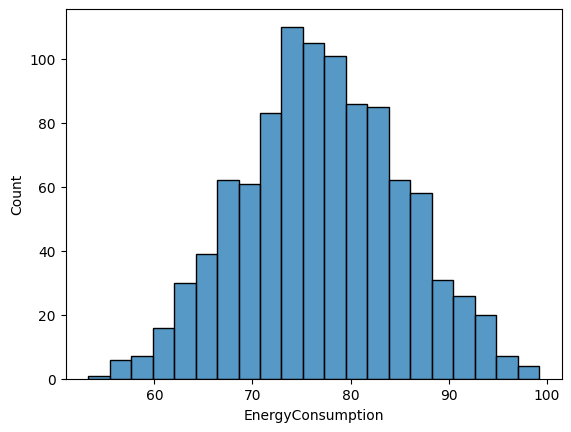

In [6]:
sns.histplot(df["EnergyConsumption"])
plt.plot()

In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Timestamp'] = label_encoder.fit_transform(df['Timestamp'])
df['HVACUsage'] = label_encoder.fit_transform(df['HVACUsage'])
df['LightingUsage'] = label_encoder.fit_transform(df['LightingUsage'])
df['DayOfWeek'] = label_encoder.fit_transform(df['DayOfWeek'])
df['Holiday'] = label_encoder.fit_transform(df['Holiday'])

In [11]:
df.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,0,25.139433,43.431581,1565.693999,5,1,0,2.774699,1,0,75.364373
1,1,27.731651,54.225919,1411.064918,1,1,1,21.831384,2,0,83.401855
2,2,28.704277,58.907658,1755.715009,2,0,0,6.764672,3,0,78.270888
3,3,20.080469,50.371637,1452.316318,1,0,1,8.623447,6,0,56.519850
4,4,23.097359,51.401421,1094.130359,9,1,0,3.071969,0,0,70.811732


In [12]:
x = df.drop(columns=["EnergyConsumption"])
y = df["EnergyConsumption"]

In [13]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)


LinearRegression()

In [16]:
ypred = model.predict(xtest)


In [18]:
mae = mean_absolute_error(ytest, ypred)
mse = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)

# Print results
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Absolute Error: 4.104668193014147
Mean Squared Error: 26.41543955279944
R-squared Score: 0.5967100801907437


In [19]:
from sklearn.ensemble import RandomForestRegressor

In [20]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(xtrain, ytrain)

RandomForestRegressor(random_state=42)

In [21]:
ypred = model.predict(xtest)


In [22]:
mae = mean_absolute_error(ytest, ypred)
mse = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)

# Print results
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Absolute Error: 4.500160265505423
Mean Squared Error: 30.66048458988368
R-squared Score: 0.5319001091444374
